In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

%matplotlib inline 
sns.set(color_codes=True)

In [2]:
# read in the .csv file - of filtered student_info

data_df = pd.read_csv("filtered_df2_A2.csv")

In [3]:
#data_df.info()

### One-Hot Encoding - categorical data

In [4]:
# One-Hot Encoding for 'highest_education', 'age_band', 'final_result', 'tenure_band'

data_df_encoded = pd.get_dummies(data_df, columns=['highest_education', 'age_band', 'final_result', 'tenure_band'])


In [5]:
#data_df_encoded.info()

In [6]:
# convert the dtype of the recently one-hot encoded columns to int64 from uint8 dtype

columns_to_convert = [
    'highest_education_A Level or Equivalent',
    'highest_education_HE Qualification',
    'highest_education_Lower Than A Level',
    'highest_education_Post Graduate Qualification',
    'age_band_0-35',
    'age_band_35-55',
    'age_band_55<=',
    'final_result_Distinction',
    'final_result_Fail',
    'final_result_Pass',
    'final_result_Withdrawn', 
    'tenure_band_0-5',
    'tenure_band_11-15',
    'tenure_band_16 or more',
    'tenure_band_5-10'
]

# Convert the selected columns to int64 dtype
data_df_encoded[columns_to_convert] = data_df_encoded[columns_to_convert].astype('int64')

In [7]:
data_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   id_student                                     383 non-null    int64
 1   gender                                         383 non-null    int64
 2   studied_credits                                383 non-null    int64
 3   highest_education_A Level or Equivalent        383 non-null    int64
 4   highest_education_HE Qualification             383 non-null    int64
 5   highest_education_Lower Than A Level           383 non-null    int64
 6   highest_education_Post Graduate Qualification  383 non-null    int64
 7   age_band_0-35                                  383 non-null    int64
 8   age_band_35-55                                 383 non-null    int64
 9   age_band_55<=                                  383 non-null    int64
 10  fi

### Algorithm 5 - Multilayer Perceptron (MLP)

In [8]:
# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# model layers
from keras.models import Sequential
from keras.layers import Dense

In [9]:
# divide the dataset into features (X) and the target variable (y)

X = data_df_encoded.drop(columns=['studied_credits'])  # drop target variable from the dataframe

y = data_df_encoded['studied_credits']        # id target variable 

In [10]:
# split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# define the model

model = Sequential()

In [12]:
# Hidden layer 1 with 2o neurons, and relu as the activation function
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))

# Hidden layer 2 with 10 neurons, and relu as the activation function
model.add(Dense(10, activation='relu'))

# Final layer with 1 neuron, and sigmoid as the activation function
# use 'softmax' for multiclass classification
model.add(Dense(1, activation='sigmoid')) 

In [13]:
# compile the model
# use 'categorical_crossentropy' for multiclass classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [14]:
# fit the model
#model.fit(X_train, y_train, epochs=10, batch_size=32)

# fit the model and store the output for graphing
history = model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
10/10 [==============================] - 1s 4ms/step - loss: -3333672.2500 - accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: -7261606.5000 - accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: -11581683.0000 - accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: -16236700.0000 - accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: -20797208.0000 - accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: -24388218.0000 - accuracy: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: -28457586.0000 - accuracy: 0.0000e+00
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: -33274150.0000 - accuracy: 0.0000e+00
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: -38828780.0000 - accuracy: 0.0000e+00
Epoch 10/10


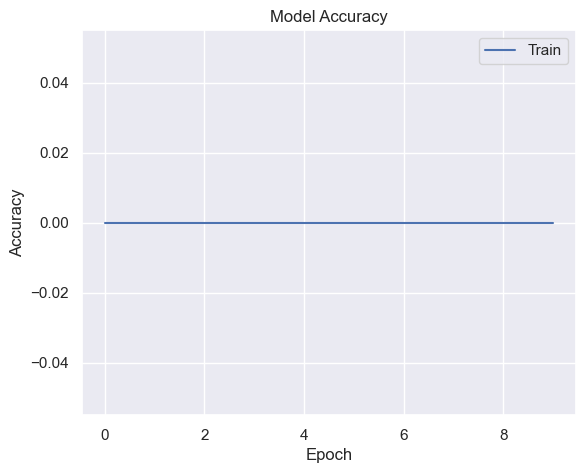

In [15]:
# Plotting the accuracy
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'])


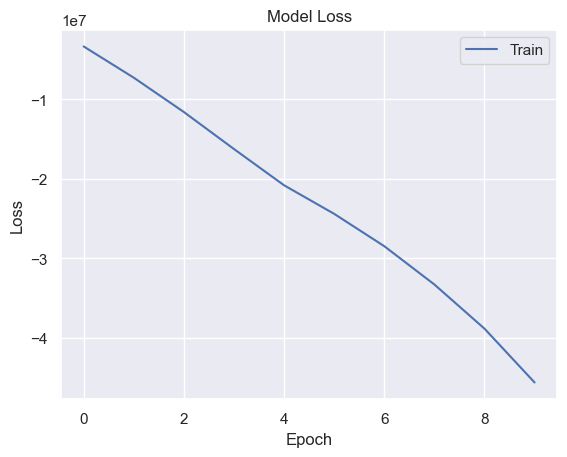

In [17]:
# Plotting the loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'])
plt.show()